https://scikit-learn.org/stable/modules/clustering.html

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from sklearn.cluster import KMeans
from sklearn import decomposition

In [3]:
NR_SAMPLES = 1000

In [4]:
attacks = ['gauss', 'fgsm', 'bim', 'pgd', 'std/8_255', 'df', 'cw']

In [5]:
characteristics_adv_pth = '../data/extracted_characteristics/run_1/cif10/wrn_28_10_10/gauss/LID/characteristics_adv'
characteristics_pth = '../data/extracted_characteristics/run_1/cif10/wrn_28_10_10/gauss/LID/characteristics'

In [6]:
characteristics = torch.load(characteristics_pth)[:NR_SAMPLES]

In [7]:
NR_SAMPLES = 100
data_clean = []
data_adv = []

for att in attacks:
    characteristics_pth = '../data/extracted_characteristics/run_1/cif10/wrn_28_10_10/{}/LID/characteristics'.format(att)
    characteristics_adv_pth = '../data/extracted_characteristics/run_1/cif10/wrn_28_10_10/{}/LID/characteristics_adv'.format(att)
    data_adv.append( torch.load(characteristics_pth)[:NR_SAMPLES] )
    data_clean.append( torch.load(characteristics_adv_pth)[:NR_SAMPLES] )

In [8]:
X_clean = np.concatenate(data_clean, axis=0)
X_adv   = np.concatenate(data_adv,   axis=0)
pca = decomposition.PCA(n_components=2)

In [9]:
X_adv.shape

(700, 13)

In [27]:
def create_figure(dat_adv, dat_clean, att='gauss', NR_SAMPLES=100):
    """
    
    """
    
    dict_attacks = {'gauss' : 0, 'fgsm' : 1, 'bim': 2, 'pgd': 3, 'aa': 4, 'df': 5, 'cw': 6}
    cdict        = {0: 'black', 1: 'pink', 2: 'blue', 3: 'red', 4: 'green', 5: 'cyan', 6: 'orange', 7: 'purple'}
    
    X = np.concatenate( [ dat_adv[ dict_attacks[att] ],  dat_clean[ dict_attacks[att] ] ] , axis=0 )
   
    pca = decomposition.PCA(n_components=2)
    Kmean = KMeans(n_clusters=2)

    pca.fit( X )
    X_tmp = pca.transform( X )
    Kmean.fit(X_tmp)
    y_kmeans = Kmean.predict(X_tmp)

    centroids = Kmean.cluster_centers_
    print(centroids)

    fig = plt.figure()
    plt.title( "Centroids of k-means clustering, {} samples".format(NR_SAMPLES) )

    plt.scatter(X_tmp[           :NR_SAMPLES,   0], X_tmp[          :NR_SAMPLES,   1], c=cdict[0], s=1)
    plt.scatter(X_tmp[ NR_SAMPLES:NR_SAMPLES*2, 0], X_tmp[NR_SAMPLES:NR_SAMPLES*2, 1], c=cdict[dict_attacks[att]+1], s=1)

    plt.scatter(centroids[0,0], centroids[0,1], s=50,  marker='s', label='clean', c=cdict[0]  )
    plt.scatter(centroids[1,0], centroids[1,1], s=50,  marker='s', label=att, c=cdict[dict_attacks[att]+1]  )

    # plt.legend(y_kmeans)
    plt.xlabel("PCA 0")
    plt.ylabel("PCA 1")
    plt.legend(framealpha=0.5)
    
    return plt

[[-8.492809   -0.4467227 ]
 [12.739228    0.67007864]]


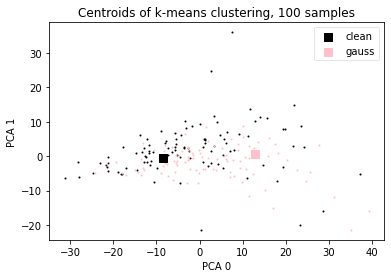

In [28]:
attname='gauss'
plt1 = create_figure(data_adv, data_clean, att=attname)
plt1.savefig("plots/kmeans/{}.png".format(attname),  bbox_inches='tight')

[[-10.966502     0.7082339 ]
 [ 11.644829    -0.75202996]]


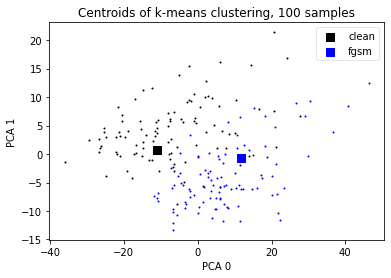

In [29]:
attname='fgsm'
plt1 = create_figure(data_adv, data_clean, att=attname)
plt1.savefig("plots/kmeans/{}.png".format(attname),  bbox_inches='tight')

[[10.268403   0.6682788]
 [-9.865712  -0.6420748]]


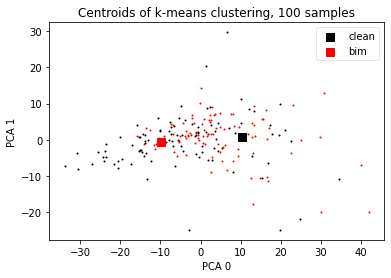

In [30]:
attname='bim'
plt1 = create_figure(data_adv, data_clean, att=attname)
plt1.savefig("plots/kmeans/{}.png".format(attname),  bbox_inches='tight')

[[12.439981    0.32514963]
 [-8.293315   -0.2167683 ]]


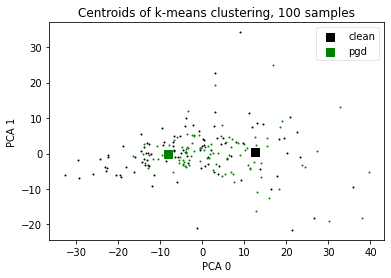

In [31]:
attname='pgd'
plt1 = create_figure(data_adv, data_clean, att=attname)
plt1.savefig("plots/kmeans/{}.png".format(attname),  bbox_inches='tight')

[[-10.378372    -0.27083558]
 [ 12.684678     0.3309991 ]]


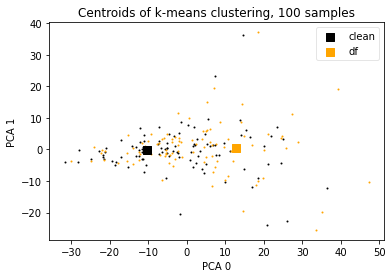

In [32]:
attname='df'
plt1 = create_figure(data_adv, data_clean, att=attname)
plt1.savefig("plots/kmeans/{}.png".format(attname),  bbox_inches='tight')

[[12.679669    0.4828859 ]
 [-9.565348   -0.36428732]]


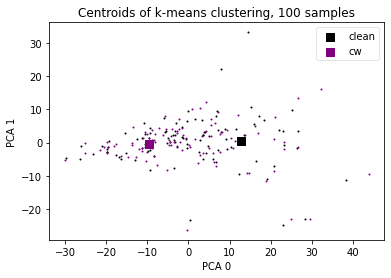

In [33]:
attname='cw'
plt1 = create_figure(data_adv, data_clean, att=attname)
plt1.savefig("plots/kmeans/{}.png".format(attname),  bbox_inches='tight')

In [34]:
# X_clean = np.concatenate(data_clean, axis=0)
X = np.concatenate([data_clean[0]] + data_adv,   axis=0)
X.shape

(800, 13)

In [35]:
attacks = ['clean', 'gauss', 'fgsm', 'bim', 'pgd', 'aa', 'df', 'cw']

In [20]:
len(data_adv)

7

In [21]:
pca   = decomposition.PCA(n_components=2)
Kmean = KMeans(n_clusters=len(attacks))

pca.fit( X )
X_tmp = pca.transform( X )
Kmean.fit(X_tmp)
y_kmeans = Kmean.predict(X_tmp)

centroids = Kmean.cluster_centers_

In [22]:
centroids

array([[ 20.613558 ,   2.7177613],
       [-10.937086 ,  -0.3477745],
       [  6.5344567,   3.2766287],
       [ 27.123062 , -15.928304 ],
       [-21.080597 ,  -2.6433406],
       [ -2.9966333,   1.9368103],
       [ 10.476632 ,  29.643572 ],
       [  4.9357905,  -6.635489 ]], dtype=float32)

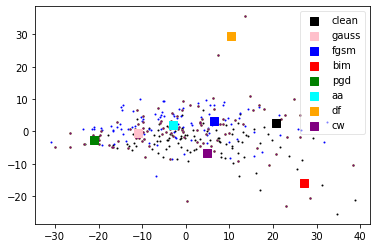

In [51]:
dict_attacks = { 'clean': 0, 'gauss' : 1, 'fgsm' : 2, 'bim': 3, 'pgd': 4, 'aa': 5, 'df': 6, 'cw': 7}
cdict        = {0: 'black', 1: 'pink', 2: 'blue', 3: 'red', 4: 'green', 5: 'cyan', 6: 'orange', 7: 'purple'}

plt.figure()
plt.scatter(X_tmp[             :NR_SAMPLES,   0], X_tmp[          :NR_SAMPLES,   1], c=cdict[0], s=1)
plt.scatter(X_tmp[ NR_SAMPLES  :NR_SAMPLES*2, 0], X_tmp[NR_SAMPLES:NR_SAMPLES*2, 1], c=cdict[dict_attacks['gauss']], s=1)
plt.scatter(X_tmp[ NR_SAMPLES*2:NR_SAMPLES*3, 0], X_tmp[NR_SAMPLES*2:NR_SAMPLES*3, 1], c=cdict[dict_attacks['fgsm'] ], s=1)
plt.scatter(X_tmp[ NR_SAMPLES*3:NR_SAMPLES*4, 0], X_tmp[NR_SAMPLES*3:NR_SAMPLES*4, 1], c=cdict[dict_attacks['bim']  ], s=1)
plt.scatter(X_tmp[ NR_SAMPLES*4:NR_SAMPLES*5, 0], X_tmp[NR_SAMPLES*4:NR_SAMPLES*5, 1], c=cdict[dict_attacks['pgd']  ], s=1)
plt.scatter(X_tmp[ NR_SAMPLES*5:NR_SAMPLES*6, 0], X_tmp[NR_SAMPLES*5:NR_SAMPLES*6, 1], c=cdict[dict_attacks['aa']   ], s=1)
plt.scatter(X_tmp[ NR_SAMPLES*6:NR_SAMPLES*7, 0], X_tmp[NR_SAMPLES*6:NR_SAMPLES*7, 1], c=cdict[dict_attacks['df']   ], s=1)
plt.scatter(X_tmp[ NR_SAMPLES*7:NR_SAMPLES*8, 0], X_tmp[NR_SAMPLES*7:NR_SAMPLES*8, 1], c=cdict[dict_attacks['cw']   ], s=1)

plt.scatter(centroids[0,0], centroids[0,1], s=50,  marker='s', label='clean', c=cdict[0]  )
plt.scatter(centroids[1,0], centroids[1,1], s=50,  marker='s', label='gauss', c=cdict[dict_attacks['gauss']]  )
plt.scatter(centroids[2,0], centroids[2,1], s=50,  marker='s', label='fgsm', c=cdict[dict_attacks['fgsm']]  )
plt.scatter(centroids[3,0], centroids[3,1], s=50,  marker='s', label='bim', c=cdict[dict_attacks['bim']]  )
plt.scatter(centroids[4,0], centroids[4,1], s=50,  marker='s', label='pgd', c=cdict[dict_attacks['pgd']]  )
plt.scatter(centroids[5,0], centroids[5,1], s=50,  marker='s', label='aa', c=cdict[dict_attacks['aa']]  )
plt.scatter(centroids[6,0], centroids[6,1], s=50,  marker='s', label='df', c=cdict[dict_attacks['df']]  )
plt.scatter(centroids[7,0], centroids[7,1], s=50,  marker='s', label='cw', c=cdict[dict_attacks['cw']]  )

plt.legend(framealpha=0.5)

plt.savefig("plots/kmeans/{}.png".format("all"),  bbox_inches='tight')